# Practice:

# Regularization: Penalized regression

In this practice notebook, first on a simulated data and then on real world data set, I will examine and compare the effects of linear regression and Ridge-Lasso and Elastic-net regressions to prevent overfitting. All these alternative regression algorithms will add some bias to the data to reduce the variance. Which shrinks the RMSE the most, that measn it's more suitable to use in the data for ML modelling.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

# Synthetic data

In [24]:
rand_state= 1000

In [22]:
url = 'https://raw.githubusercontent.com/PJalgotrader/ML-USU-SP21/main/Classes/Class%209-%20Regularization%20(Python)/Regularization_synthetic.csv'

df = pd.read_csv(url)

# set option to display all numbers with 6 decimal places
pd.set_option('display.float_format', '{:.6f}'.format)

df.head()

,X1,X2,X3,X4,X5,y
0,1.668068,2.782452,4.641320,7.742038,12.914249,-3.901562
1,0.925862,0.857220,0.793667,0.734826,0.680348,-0.384578
2,1.057997,1.119357,1.184276,1.252960,1.325628,12.493677
3,-0.920339,0.847024,-0.779549,0.717449,-0.660297,12.237389
4,1.299748,1.689346,2.195725,2.853890,3.709339,-3.772851


In [25]:
df.head()

,X1,X2,X3,X4,X5,y
0,1.668068,2.782452,4.641320,7.742038,12.914249,-3.901562
1,0.925862,0.857220,0.793667,0.734826,0.680348,-0.384578
2,1.057997,1.119357,1.184276,1.252960,1.325628,12.493677
3,-0.920339,0.847024,-0.779549,0.717449,-0.660297,12.237389
4,1.299748,1.689346,2.195725,2.853890,3.709339,-3.772851


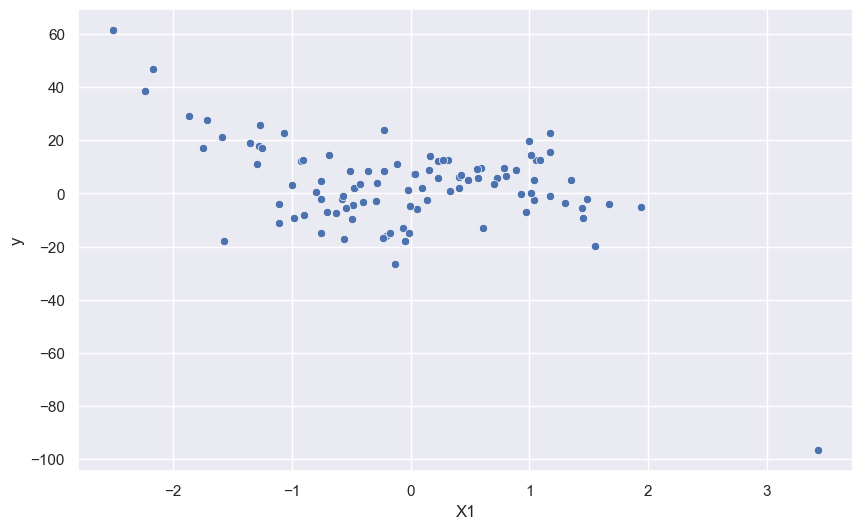

In [26]:
sns.scatterplot(x="X1", y='y', data=df)
plt.show()

important: we need to normalize the features before training the models.

Bec one data can be percentage and other another type. So we should normalize all them before using them in the model.

**Feature Scaling**

In [27]:
from sklearn.preprocessing import StandardScaler
# Feature scaling has 2 types: min-max normalization and standardization. here we first perform the standardization

In [28]:
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)
# this takes all values and after subtracting mean divides by std to standardize the data
df_sc[0:3]

# compare with the df.head() above. now it has been normalized

array([[ 1.68559489,  1.10379599,  0.93969261,  0.28529469,  0.20893775,
        -0.41160092],
       [ 0.95551657, -0.1126954 ,  0.15582326, -0.19468946, -0.0400858 ,
        -0.20670883],
       [ 1.08549235,  0.0529405 ,  0.23540071, -0.159198  , -0.02695098,
         0.54355141]])

In [29]:
# what have done here? we used std to standardize the values
df.describe()

,X1,X2,X3,X4,X5,y
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.045528,1.035573,0.028803,3.577067,2.649662,3.163589
std,1.021734,1.590583,4.933266,14.672387,49.374982,17.251525
min,-2.502813,0.000077,-15.677801,0.000000,-98.206875,-96.615135
25%,-0.715772,0.106957,-0.367584,0.011462,-0.189401,-4.740569
50%,-0.056092,0.513483,-0.000186,0.263974,-0.000001,3.535766
75%,0.708103,1.265628,0.355353,1.605267,0.178540,12.250487
max,3.428563,11.755044,40.302907,138.181054,473.762442,61.375324


In [30]:
# checking the first observation for y1
print(df.loc[0,"y"])

# when we use std of y to normalize it: we subtract the mean from the value and then divide by std

(-3.901562-3.163589)/17.251525

-3.901561631


-0.4095377655018904

In [31]:
# convert normalized df_sc to a dataframe
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'y'], dtype='object')

In [32]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,X1,X2,X3,X4,X5,y
0,1.685595,1.103796,0.939693,0.285295,0.208938,-0.411601
1,0.955517,-0.112695,0.155823,-0.194689,-0.040086,-0.206709
2,1.085492,0.052941,0.235401,-0.159198,-0.026951,0.543551
3,-0.860516,-0.119138,-0.164683,-0.195880,-0.067375,0.528621
4,1.323294,0.413098,0.441460,-0.049537,0.021570,-0.404102


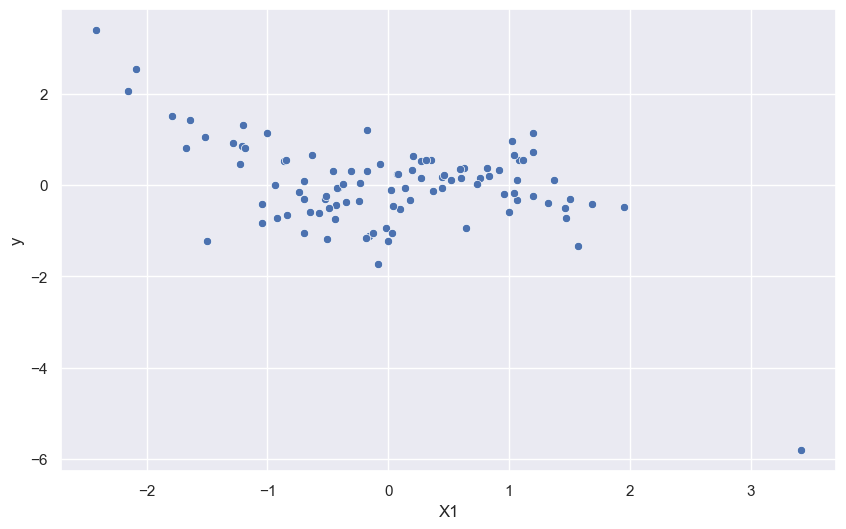

In [33]:
# SCALE has been normalized. df de veriler -100den+60a range idi. standardize edilmiste ise 99% -3,+3 rangeinde olur.
# en alt kösedeki -6 kesinlikle bir outlier. 6 std uzakta olmamalı.
sns.scatterplot(x='X1', y='y', data=df_sc)
plt.show()

**Splitting the data**

In [34]:
y = df_sc['y']
X = df_sc.drop('y', axis=1) # be careful inplace= False

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

X_train.head()

,X1,X2,X3,X4,X5
37,1.464631,0.662152,0.606819,0.052327,0.073610
44,1.572794,0.870372,0.757779,0.153824,0.130178
55,0.275319,-0.619639,-0.003245,-0.244817,-0.053920
66,-0.493702,-0.464986,-0.039290,-0.238872,-0.054935
82,0.272588,-0.620456,-0.003337,-0.244827,-0.053921


As we can see from the table above, the variables are highly correlated with each other.

**A) Training the models**

In this section we will train 4 different models:

- Linear regression (model_linear)
- Ridge regression (model_ridge)
- Lasso regression (model_lasso)
- Elastic Net regression (model_net)

In [35]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

**Cross Validation**

In [36]:
# optimal alpha for ridge R
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)
alpha_ridge_opt = ridgecv.alpha_

# optimal for lasso R
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
alpha_lasso_opt = lassocv.alpha_

# optimal for elastic net R
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
alpha_elasticnet_opt = elasticnetcv.alpha_

In [37]:
model_linear = LinearRegression()
model_ridge = Ridge(alpha=alpha_ridge_opt)
model_lasso = Lasso(alpha=alpha_lasso_opt)
model_net = ElasticNet(alpha=alpha_elasticnet_opt)

In [38]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [39]:
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
88,1.307243,0.171067,0.175576,0.154862,0.163279
4,-0.404102,-0.079686,-0.032038,-0.047122,-0.044388
62,-1.055680,-0.180921,-0.148966,-0.148200,-0.149537
63,2.538916,2.344482,2.083804,2.156366,2.139361
48,1.144605,-0.078630,-0.001604,-0.031199,-0.022572


# coefficients

In [40]:
df.drop('y', axis=1, inplace=False).columns

Index(['X1', 'X2', 'X3', 'X4', 'X5'], dtype='object')

In [41]:
coefficients = pd.DataFrame({'Features':df.drop('y', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,X1,0.537047,0.256687,0.322054,0.308461
1,X2,0.103655,0.192091,0.156880,0.165614
2,X3,-2.133872,-0.963844,-1.183806,-1.151128
3,X4,0.253492,-0.041360,-0.000000,-0.000000
4,X5,1.593336,-0.221195,0.000000,-0.000000


As it can be seen above, ridge reg shrunk the lin features' coefficients. However, it didn't eliminate any of them.

On the other hand, lasso and elastic net eliminated x4 and x5 and decreased all other.

# Performance in the test set

In [42]:

MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_linear']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

# linear reg RMSE is 2.037. let's check how the other reg models decreased this and which is the most efficient

2.037

In [43]:
# Ridge
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.894

In [44]:
# Lasso
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.81

In [45]:
# Elastic-net
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_net']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.781

As it can be seen from the results, all reg models could bat Linear reg RMSE. However, best performance is performed by elastic-net which shrunk the RMSE to 0.781. So, in a real case we will perform all these alternative models and pick up the one with the lowest RMSE to regularize the data efficiently.

# 2. Boston Housing Data

Regularization force the learning algorithm to build a less complex model . In practice, that often leads to slightly higher bias but significantly reduces the variance. The most common penalized regression models are:

- Ridge regression
- Lasso regression
- Elastic Net regression

In this notebook we will explore the three methods and compare their results with a multiple linear regression model applied to Boston Housing dataset. The target variable is price and the features are 10 polynomial features of LSTAT: % lower status of the population. LSTAT2= LSTAT2, LSTAT3= LSTAT3, and etc.

In [48]:
url_bos = 'https://raw.githubusercontent.com/PJalgotrader/ML-USU-SP21/main/Classes/Class%209-%20Regularization%20(Python)/Regularization_Boston.csv'

df = pd.read_csv(url_bos)

df.head()

# we increase the number of features to 10 to find the best model.

,price,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
0,24.000000,4.980000,24.800400,123.505992,615.059840,3062.998004,15253.730060,75963.575700,378298.607000,1883927.063000,9381956.772000
1,21.600000,9.140000,83.539600,763.551944,6978.864768,63786.823980,583011.571200,5328725.761000,48704553.450000,445159618.600000,4068758914.000000
2,34.700000,4.030000,16.240900,65.450827,263.766833,1062.980336,4283.810755,17263.757340,69572.942090,280378.956600,1129927.195000
3,33.400000,2.940000,8.643600,25.412184,74.711821,219.652754,645.779096,1898.590541,5581.856191,16410.657200,48247.332170
4,36.200000,5.330000,28.408900,151.419437,807.065599,4301.659644,22927.845900,122205.418700,651354.881400,3471721.518000,18504275.690000


9381956.77248839

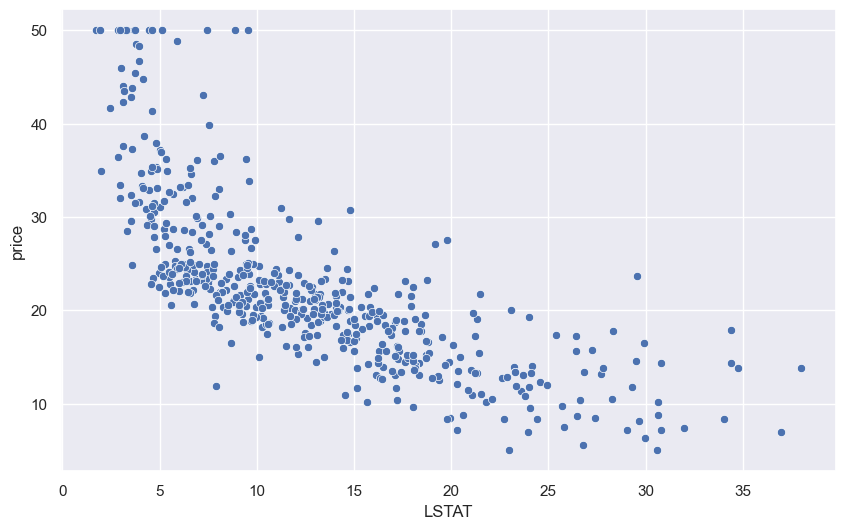

In [49]:
sns.scatterplot(x='LSTAT', y='price', data=df)
plt.show()

**important:** we need to normalize the features before training the models. Why?

Because, when we check the coefficient of features, they differ in a huge range. For example, LSTAT is 4.98 for the first observation and LSTAT10 is 9381956 (4.98**10= 9381956). If we leave these coefficients as they are, then the model interpret the features eith higher coefficients as more important to determine the price. Since we want to acoid this misclaculation, we have to first standardize and normalize the coefficients by feature scaling.

# Normalization: Feuature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)
df_sc

array([[ 0.15968566, -1.0755623 , -0.78952949, ..., -0.20115811,
        -0.1777807 , -0.15953586],
       [-0.10152429, -0.49243937, -0.54045362, ..., -0.20100802,
        -0.17774223, -0.15952611],
       [ 1.32424667, -1.2087274 , -0.82582493, ..., -0.20115907,
        -0.17778084, -0.15953588],
       ...,
       [ 0.14880191, -0.98304761, -0.7598079 , ..., -0.20115611,
        -0.17778036, -0.1595358 ],
       [-0.0579893 , -0.86530163, -0.71663755, ..., -0.20114963,
        -0.17777912, -0.15953557],
       [-1.15724782, -0.66905833, -0.63138918, ..., -0.20111311,
        -0.1777707 , -0.15953367]])

In [52]:
df.describe()
# when we compare the std and means, huge amount of outliers can be detected in the overall data.
# A similar comment can be made for the min-25% and 75%-max caomparisons. Both in the bottom and upper part of 
# data, there are outliers.

,price,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,12.653063,210.993989,4285.788793,100133.564373,2587608.744454,71980290.634747,2114923310.432112,64770766387.700996,2048399343048.692627,66452921435633.039062
std,9.197104,7.141062,236.061920,7329.288372,234205.947171,7737927.473318,262850303.079056,9126325514.202841,322306095752.119202,11533448502146.974609,416951237857214.000000
min,5.000000,1.730000,2.992900,5.177717,8.957450,15.496389,26.808753,46.379143,80.235918,138.808138,240.138079
25%,17.025000,6.950000,48.303700,335.727443,2333.480622,16219.315700,112738.405675,783650.371825,5447333.352750,37866640.430000,263233326.450000
50%,21.200000,11.360000,129.050000,1466.017088,16654.108980,189193.023650,2149266.056000,24416116.450000,277373100.650000,3151036551.500000,35796773710.500000
75%,25.000000,16.955000,287.472100,4874.091998,82640.294468,1401167.653500,23756828.525000,402797657.150000,6829446727.750000,115793500000.000000,1963285000000.000000
max,50.000000,37.970000,1441.720900,54742.142570,2078559.153000,78922891.060000,2996702173.000000,113785000000.000000,4320410000000.000000,164046000000000.000000,6228820000000000.000000


In [53]:
# checking the first observation for LSTAT
(24-22.5328)/9.197104
# first obs is 24. we subtract the mean and divide into std to normalize it.
# when we check the first onservation of LSTAT below in df_sc, it's the same.

0.1595284776599241

In [54]:
df.columns

Index(['price', 'LSTAT', 'LSTAT2', 'LSTAT3', 'LSTAT4', 'LSTAT5', 'LSTAT6',
       'LSTAT7', 'LSTAT8', 'LSTAT9', 'LSTAT10'],
      dtype='object')

In [55]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,price,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
0,0.159686,-1.075562,-0.789529,-0.568459,-0.425339,-0.334341,-0.274058,-0.231960,-0.201158,-0.177781,-0.159536
1,-0.101524,-0.492439,-0.540454,-0.481046,-0.398141,-0.326485,-0.271896,-0.231384,-0.201008,-0.177742,-0.159526
2,1.324247,-1.208727,-0.825825,-0.576388,-0.426841,-0.334599,-0.274100,-0.231966,-0.201159,-0.177781,-0.159536
3,1.182758,-1.361517,-0.858040,-0.581856,-0.427649,-0.334708,-0.274114,-0.231968,-0.201159,-0.177781,-0.159536
4,1.487503,-1.026501,-0.774228,-0.564647,-0.424519,-0.334180,-0.274029,-0.231955,-0.201157,-0.177781,-0.159536


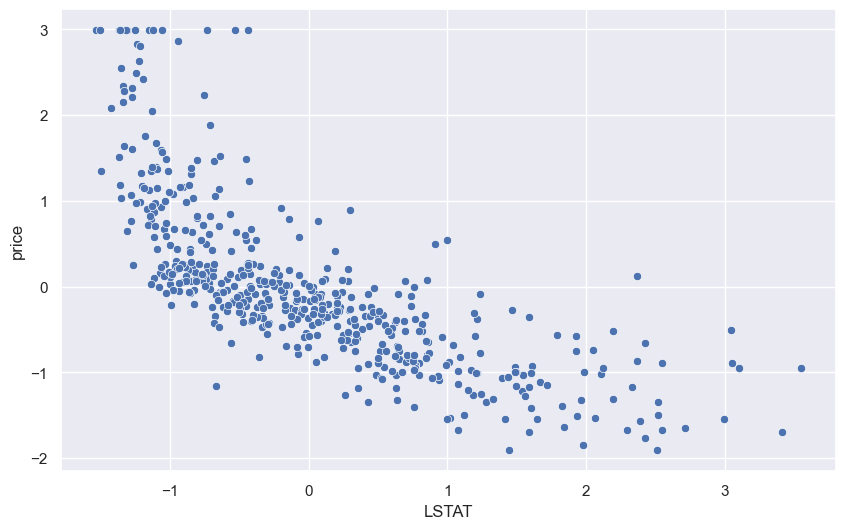

In [56]:
# scatter plot for price and LSTAT in scaled df_sc
sns.scatterplot(x='LSTAT', y='price', data=df_sc)
plt.show()

**IMPORTANT**: Feature scaling does not change the pattern. It just changes the magnitude. If we check the scatter plot between price and LSTAT before and after feature scaling, we can see that the pattern is the same. However:

Price range was from 0 to 50 for df, it's from -2 to 2 in scaled df_sc. Similarly, LSTAT was from 0 to 40 in df, it's between 0 and 4 in the scaled data.

# Splitting the data

In [57]:
y = df_sc['price']
X = df_sc.drop('price', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
300,-0.922773,-0.738456,-0.554782,-0.422166,-0.333671,-0.273926,-0.231935,-0.201154,-0.177780,-0.159536
32,2.110588,2.361250,2.320551,2.091900,1.778692,1.449896,1.143940,0.878417,0.658205,0.481244
181,-0.448985,-0.516017,-0.470071,-0.393883,-0.324988,-0.271404,-0.231230,-0.200962,-0.177729,-0.159522
272,-0.690084,-0.641318,-0.522245,-0.412708,-0.331167,-0.273304,-0.231787,-0.201120,-0.177772,-0.159534
477,1.718101,1.736491,1.525676,1.217641,0.905982,0.635721,0.420786,0.259256,0.142724,0.061306


As we can see from the table above, the variables are highly correlated with each other. Let's first run a linear regression and see the results as a benchmark.

In [59]:
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

In [60]:
sm.OLS(y_train, X_train_wc).fit().summary()

# R2 is 67%. that means, even with 10 feaures our model does pretty well.

# peki hangi feature daha etkili. Asagida p valuelara baktigimizda, tamaminin alpha 0.05'ten yuksek oldugunu 
# ve herhangi birinin pricei aciklamakta yetersiz kaldigini goruyoruz. There is no causality. We don't have a story.
# DOlayısıyla bunlari duzeltmeliyiz: Regularization

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     82.44
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           4.51e-90
Time:                        11:36:06   Log-Likelihood:                -344.23
No. Observations:                 404   AIC:                             710.5
Df Residuals:                     393   BIC:                             754.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0120      0.029      0.417      0.677      -0.044       0.068
LSTAT         10.4856     14.789      0.709      0.479     -18.591      39.562
LSTAT2      -198.4474    183.865     -1.079      0.281    -559.929     163.035
LSTAT3      1218.5360   1157.209      1.053      0.293   -1056.559    3493.631
LSTAT4     -4039.5201   4549.147     -0.888      0.375    -1.3e+04    4904.187
LSTAT5      8029.8874   1.19e+04      0.675      0.500   -1.54e+04    3.14e+04
LSTAT6     -9630.6577   2.11e+04     -0.456      0.649   -5.11e+04    3.19e+04
LSTAT7      6399.3109   2.51e+04      0.255      0.799    -4.3e+04    5.58e+04
LSTAT8     -1554.6344   1.92e+04     -0.081      0.935   -3.93e+04    3.62e+04
LSTAT9      -523.9209   8485.139     -0.062      0.951   -1.72e+04    1.62e+04
LSTAT10      288.1740   1645.665      0.175      0.861   -2947.235    3523.583
==============================================================================
Omnibus:                      106.759   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.634
Skew:                           1.217   Prob(JB):                     3.91e-70
Kurtosis:                       6.614   Cond. No.                     4.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# A) Training the models

In this section we will train 4 different models:

- Linear regression (model_linear)
- Ridge regression (model_ridge)
- Lasso regression (model_lasso)
- Elastic Net regression (model_net)

In [61]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [62]:
# starting with default parameters:

# optimal alpha for ridge R
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)
alpha_ridge_opt = ridgecv.alpha_

# optimal for lasso R
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
alpha_lasso_opt = lassocv.alpha_

# optimal for elastic net R
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
alpha_elasticnet_opt = elasticnetcv.alpha_



model_linear = LinearRegression()
model_ridge = Ridge(alpha=alpha_ridge_opt)
model_lasso = Lasso(alpha=alpha_lasso_opt)
model_net = ElasticNet(alpha=alpha_elasticnet_opt)

In [63]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [64]:
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
483,-0.079757,-0.019459,0.029108,0.062848,0.091023
426,-1.342272,-0.480570,-0.589703,-0.576485,-0.563686
22,-0.798084,-0.736176,-0.786380,-0.812437,-0.818686
268,2.282016,2.053967,1.495823,1.445509,1.376081
371,2.989460,0.041490,0.171371,0.200742,0.226367


# coefficients

In [65]:
df.drop('price', axis=1, inplace=False).columns

Index(['LSTAT', 'LSTAT2', 'LSTAT3', 'LSTAT4', 'LSTAT5', 'LSTAT6', 'LSTAT7',
       'LSTAT8', 'LSTAT9', 'LSTAT10'],
      dtype='object')

In [66]:
coefficients = pd.DataFrame({'Features':df.drop('price', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients
# lasso eliminated 6 features by making their coefficients 0, and elastic-net eliminated 4.

,Features,model_lin,model_ridge,model_lasso,model_net
0,LSTAT,10.485596,-1.997427,-1.901055,-1.579415
1,LSTAT2,-198.447363,1.120503,1.321663,0.626476
2,LSTAT3,1218.536029,0.705506,0.000000,0.403711
3,LSTAT4,-4039.520114,-0.029523,-0.000000,0.000000
4,LSTAT5,8029.887432,-0.331986,-0.000000,-0.000000
5,LSTAT6,-9630.657689,-0.305169,-0.112151,-0.028265
6,LSTAT7,6399.310944,-0.150135,-0.013339,-0.102566
7,LSTAT8,-1554.634407,0.007747,-0.000000,-0.012358
8,LSTAT9,-523.920943,0.115016,-0.000000,-0.000000
9,LSTAT10,288.174049,0.159595,-0.000000,-0.000000


# Performance in the test set

In [67]:
# linear
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_linear']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.541

**BUT what is this RMSE unit? percentage or dollar or etc?**

The unit of RMSE is the same with our target unit. In this case, the house prices are in dollars and RMSE is in dollars. Wr can multiply it with 1000 dollars and see that RMSE is 541 dollars.

This means, in our test set, average mean error is 541 dollars, which is not bad.

In [68]:
# ridge
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,5)

0.55867

In [69]:
# lasso
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.557

In [70]:
# elastic-net
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_net']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.559

**Result:** Any of the penalized regressions do not improve the performance of the model. That means, we have to use some non-parametric algorithms for this model.

# Plotting the regression coefficients vs alphas:

# 1) Ridge regression coefficients vs alpha

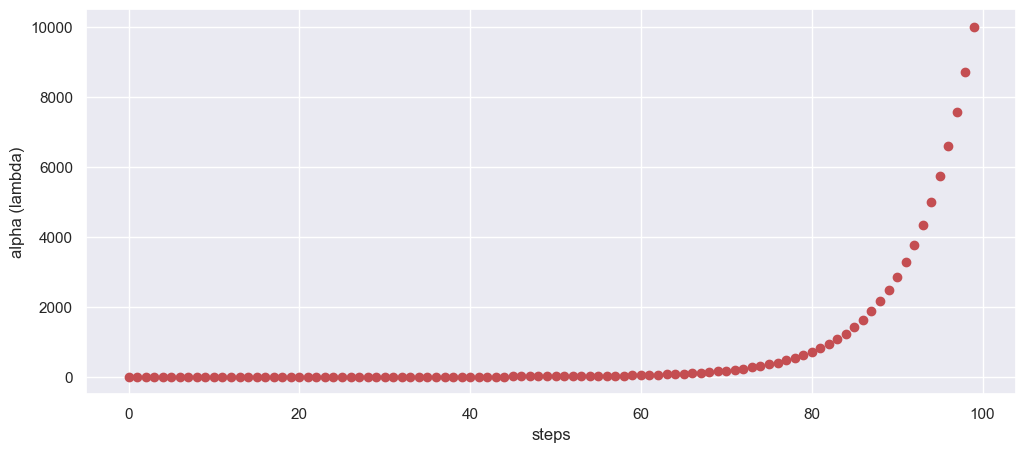

In [71]:
alpha_ridge = 10**np.linspace(-2,4,100)
plt.figure(figsize=(12,5))
plt.plot(alpha_ridge,'or' )
plt.xlabel('steps')
plt.ylabel('alpha (lambda)')
plt.show()

In [72]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

(100, 10)

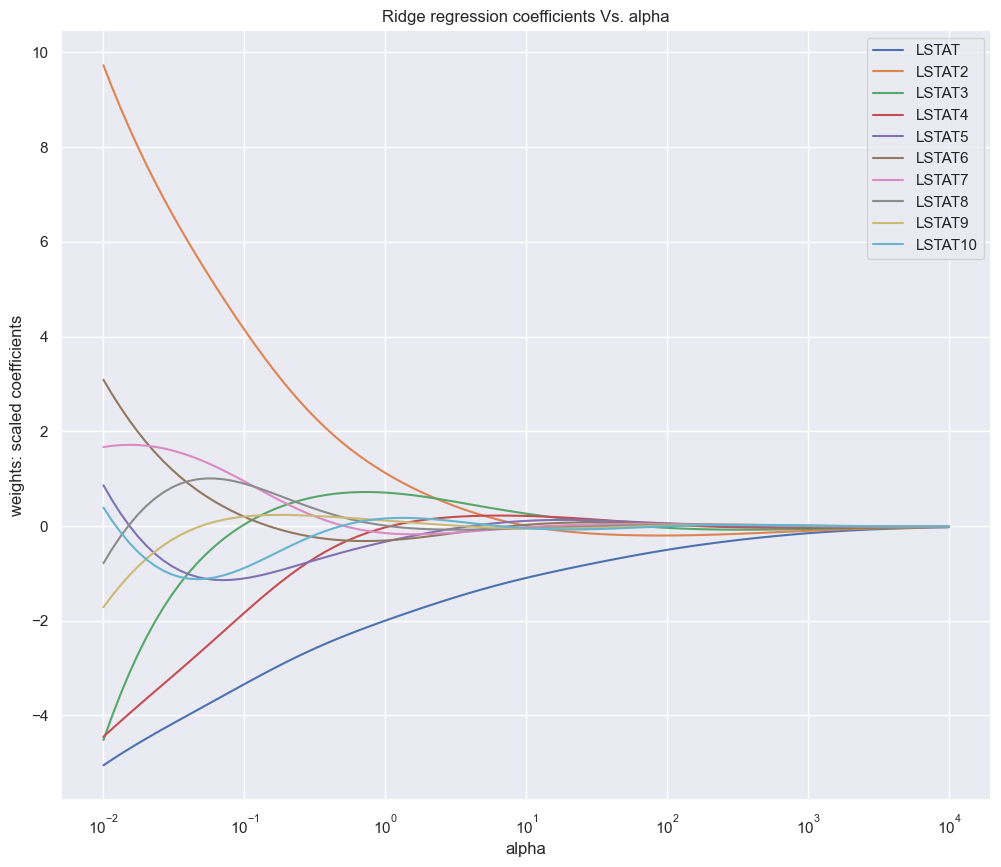

In [73]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

# 2) Lasso regression coefficients vs alpha

In [74]:
alpha_lasso = 10**np.linspace(-3,1,100)

In [75]:
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 10)

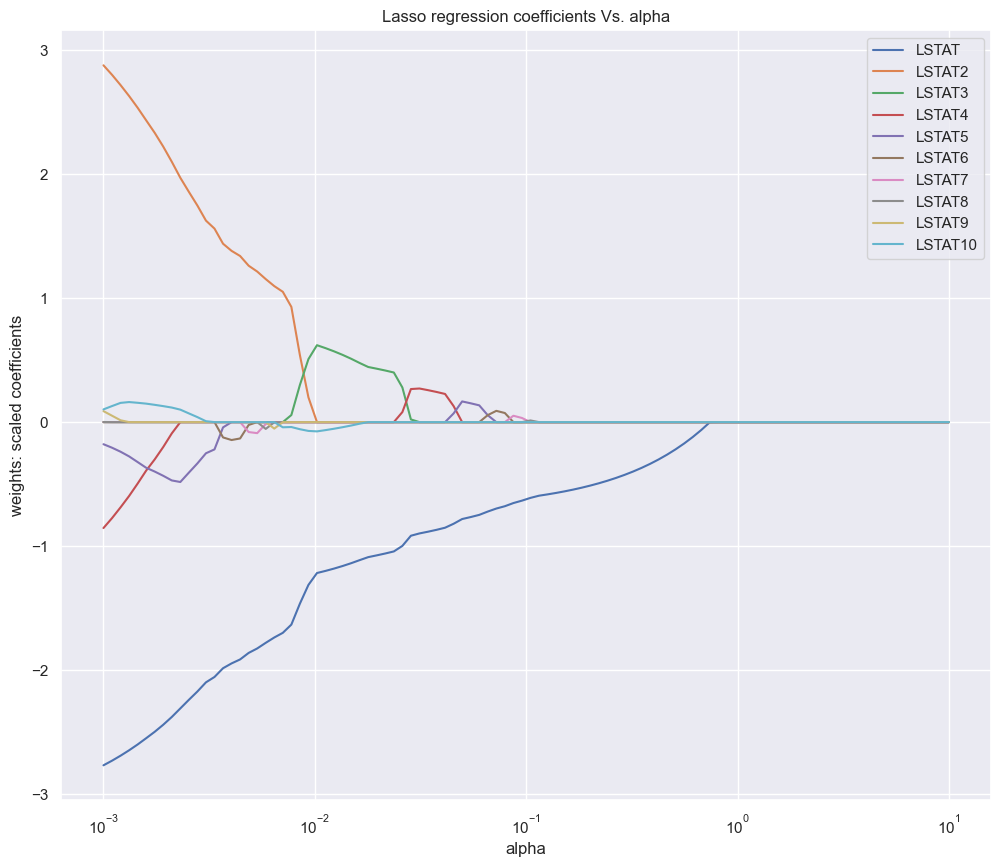

In [76]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

# 3) Elastic Net regression coefficients vs alpha

In [78]:
alpha_elasticnet = 10**np.linspace(-3,2,100)

In [79]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

(100, 10)

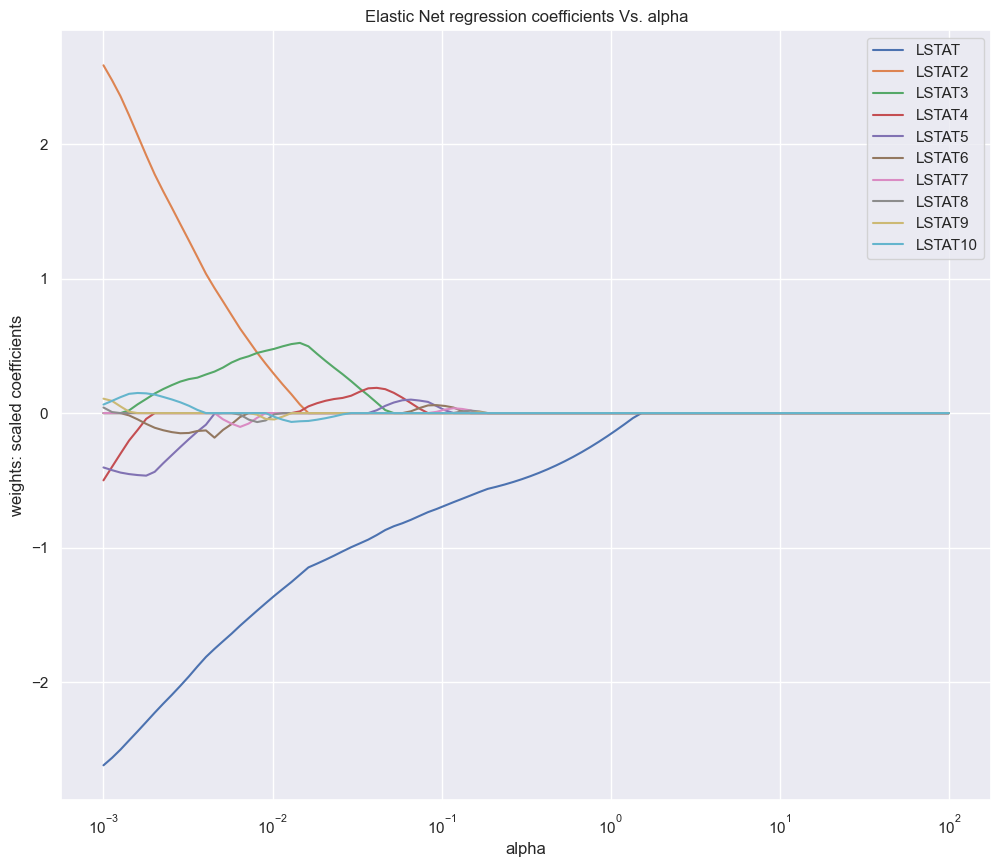

In [80]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

# Cross Validation

Let's use cross validation to find the optimal Lambdas (alphas) for different models. Training asamasinin hemen basinda yapmaliyiz bu kismi ve cikan alphalari penalized regressionlarin paramtresi olarak kullanmaliyiz.

# 1) Optimal alpha for Ridge regression

In [82]:
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.1

In [83]:
alpha_ridge_opt = ridgecv.alpha_

# 2) Optimal alpha for Lasso regression

In [85]:
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.0007404280761639708

In [86]:
alpha_lasso_opt = lassocv.alpha_

# 3) Optimal alpha for Elastic Net regression

In [87]:
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.0014808561523279417

In [88]:
elasticnetcv.l1_ratio_

0.5

In [89]:
alpha_elasticnet_opt = elasticnetcv.alpha_